In [400]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [401]:

# Reemplaza 'ruta/al/archivo.parquet' con la ruta de tu archivo .parquet
df_apilado = pd.DataFrame()
for i in range(2018, 2025):
    df = pd.read_parquet(f"./DATA/dataMigracion/{i}.parquet")
    df_apilado = pd.concat([df_apilado, df], axis=0)

df_apilado.sample(10)

,cantidad_de_filas,agnio,region_destino,region_nacionalidad,entrada_salida,sexo,categoria_migratoria,motivo_viaje,departamento_hospedaje,ciudad_hospedaje,colombiano_extranjero,puesto_migratorio,tipo_transporte,centro_regional,pais_nacionalidad,meses,pais_destino_procedencia,rango_edad,departamento,tipo_viajero
92765,4,2021,América del Norte,América del Sur,Entradas,Masculino,Sin Especificar,Residente,Valle del Cauca,Yumbo,Colombianos,Aeropuerto Alfonso Bonilla Aragón de Cali,Aéreo,Occidente,Colombia,Abril,Estados Unidos,30-39,Valle del Cauca,Residente
1919028,1,2022,América Central y el Caribe,América del Sur,Entradas,Masculino,Sin Especificar,Trabajo,Valle del Cauca,Cali,Colombianos,Aeropuerto Eldorado de Bogotá,Aéreo,Aeropuerto Eldorado,Colombia,Mayo,República Dominicana,50-59,Bogotá,Visitante
1714807,6,2022,América Central y el Caribe,Europa,Entradas,Femenino,Turismo,Turismo,Bogota D.C.,"Bogotá, D.C.",Extranjeros,Aeropuerto Eldorado de Bogotá,Aéreo,Aeropuerto Eldorado,Italia,Agosto,República Dominicana,30-39,Bogotá,Visitante
1193322,1,2023,América del Norte,Europa,Entradas,Femenino,Turismo,Turismo,Antioquia,Medellín,Extranjeros,Aeropuerto José María Córdova de Rionegro,Aéreo,Antioquia,Federación de Rusia,Diciembre,Canadá,40-49,Antioquía,Visitante
119879,1,2024,América Central y el Caribe,Asia,Entradas,Femenino,Permiso Otras Actividades,Tránsito,Norte de Santander,Cúcuta,Extranjeros,Aeropuerto Camilo Daza de Cúcuta,Aéreo,Oriente,Filipinas,Agosto,Panamá,30-39,Norte de Santander,Visitante
246796,1,2024,América del Sur,América del Sur,Entradas,Masculino,Turismo,Turismo,Bolívar,Cartagena,Extranjeros,Aeropuerto José María Córdova de Rionegro,Aéreo,Antioquia,Chile,Abril,Chile,30-39,Antioquía,Visitante
541276,1,2023,América Central y el Caribe,América Central y el Caribe,Salidas,Femenino,Permiso de Integración y Desarrollo,Conferencia,No Aplica,No Aplica,Extranjeros,Aeropuerto José María Córdova de Rionegro,Aéreo,Antioquia,México,Noviembre,México,50-59,Antioquía,Visitante
612456,26,2023,América Central y el Caribe,América del Sur,Salidas,Femenino,Sin Especificar,Residente,No Aplica,No Aplica,Colombianos,Aeropuerto Alfonso Bonilla Aragón de Cali,Aéreo,Occidente,Colombia,Mayo,México,18-29,Valle del Cauca,Residente
1923840,1,2022,América del Sur,América del Sur,Entradas,Masculino,Sin Especificar,Residente,Atlántico,Barranquilla,Colombianos,Aeropuerto Eldorado de Bogotá,Aéreo,Aeropuerto Eldorado,Colombia,Diciembre,Argentina,50-59,Bogotá,Residente
3509434,1,2018,Europa,América del Sur,Salidas,Femenino,Sin Especificar,Residente,No Aplica,No Aplica,Colombianos,Aeropuerto Alfonso Bonilla Aragón de Cali,Aéreo,Occidente,Colombia,Enero,España,70 o Mas,Valle del Cauca,Residente


In [402]:
df_apilado.shape

(12465233, 20)

In [403]:
# le_entradas_salidas= LabelEncoder()
# le_entradas_salidas.fit(df["entrada_salida"])
# df["entrada_salida_b"]=le_entradas_salidas.transform(df["entrada_salida"])
# # filtrar: categoria_migratoria, motivo_viaje ( ue se cuece), ciudad_hospedaje
# #pais_nacionalidad onehot
columnas=["sexo","pais_nacionalidad"]
df_filtrado=df_apilado[(df_apilado["categoria_migratoria"]=="Turismo") & (df_apilado["ciudad_hospedaje"]=="Medellín")]
df_filtrado.sample(10)


,cantidad_de_filas,agnio,region_destino,region_nacionalidad,entrada_salida,sexo,categoria_migratoria,motivo_viaje,departamento_hospedaje,ciudad_hospedaje,colombiano_extranjero,puesto_migratorio,tipo_transporte,centro_regional,pais_nacionalidad,meses,pais_destino_procedencia,rango_edad,departamento,tipo_viajero
1464655,3,2023,Europa,Europa,Entradas,Masculino,Turismo,Negocios,Antioquia,Medellín,Extranjeros,Aeropuerto José María Córdova de Rionegro,Aéreo,Antioquia,Italia,Mayo,España,30-39,Antioquía,Visitante
186214,1,2021,América del Sur,América del Sur,Entradas,Femenino,Turismo,Turismo,Antioquia,Medellín,Extranjeros,Aeropuerto José María Córdova de Rionegro,Aéreo,Antioquia,Venezuela,Febrero,Argentina,30-39,Antioquía,Visitante
1528615,6,2018,América del Norte,América del Norte,Entradas,Femenino,Turismo,Turismo,Antioquia,Medellín,Extranjeros,Aeropuerto José María Córdova de Rionegro,Aéreo,Antioquia,Canadá,Marzo,Canadá,18-29,Antioquía,Visitante
1059156,1,2024,América del Sur,América del Sur,Entradas,Femenino,Turismo,Eventos,Antioquia,Medellín,Extranjeros,Aeropuerto José María Córdova de Rionegro,Aéreo,Antioquia,Chile,Septiembre,Chile,18-29,Antioquía,Visitante
883347,1,2024,América del Sur,América del Sur,Entradas,Masculino,Turismo,Negocios,Antioquia,Medellín,Extranjeros,Aeropuerto José María Córdova de Rionegro,Aéreo,Antioquia,Brasil,Septiembre,Brasil,60-69,Antioquía,Visitante
442887,5,2021,América Central y el Caribe,Europa,Entradas,Masculino,Turismo,Turismo,Antioquia,Medellín,Extranjeros,Aeropuerto José María Córdova de Rionegro,Aéreo,Antioquia,Países Bajos,Septiembre,Curazao,50-59,Antioquía,Visitante
322184,1,2024,América del Sur,América del Sur,Entradas,Masculino,Turismo,Turismo,Antioquia,Medellín,Extranjeros,Aeropuerto Rafael Núñez de Cartagena,Aéreo,Caribe,Perú,Mayo,Perú,60-69,Bolivar,Visitante
2434562,1,2018,América Central y el Caribe,América del Sur,Entradas,Masculino,Turismo,Turismo,Antioquia,Medellín,Extranjeros,Aeropuerto José María Córdova de Rionegro,Aéreo,Antioquia,Perú,Enero,Panamá,30-39,Antioquía,Visitante
623787,2,2018,América del Sur,América del Sur,Entradas,Masculino,Turismo,Turismo,Antioquia,Medellín,Extranjeros,Aeropuerto Eldorado de Bogotá,Aéreo,Aeropuerto Eldorado,Venezuela,Noviembre,Chile,60-69,Bogotá,Visitante
323113,1,2019,América del Sur,Europa,Entradas,Masculino,Turismo,Negocios,Antioquia,Medellín,Extranjeros,Aeropuerto Eldorado de Bogotá,Aéreo,Aeropuerto Eldorado,Alemania,Julio,Perú,50-59,Bogotá,Visitante


In [404]:
# Diccionario de meses a números
mes_a_numero = {
    "enero": 1, "febrero": 2, "marzo": 3, "abril": 4, 
    "mayo": 5, "junio": 6, "julio": 7, "agosto": 8, 
    "septiembre": 9, "octubre": 10, "noviembre": 11, "diciembre": 12
}

# Lambda que convierte el nombre del mes al número correspondiente
df_filtrado["meses"] = df_filtrado["meses"].apply(lambda x: mes_a_numero.get(x.lower(), None))


C:\Users\santi\AppData\Local\Temp\ipykernel_40972\3586380238.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["meses"] = df_filtrado["meses"].apply(lambda x: mes_a_numero.get(x.lower(), None))


In [405]:
df_filtrado['cantidad_de_filas'] = df_filtrado['cantidad_de_filas'].fillna(1)


C:\Users\santi\AppData\Local\Temp\ipykernel_40972\3624677051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['cantidad_de_filas'] = df_filtrado['cantidad_de_filas'].fillna(1)


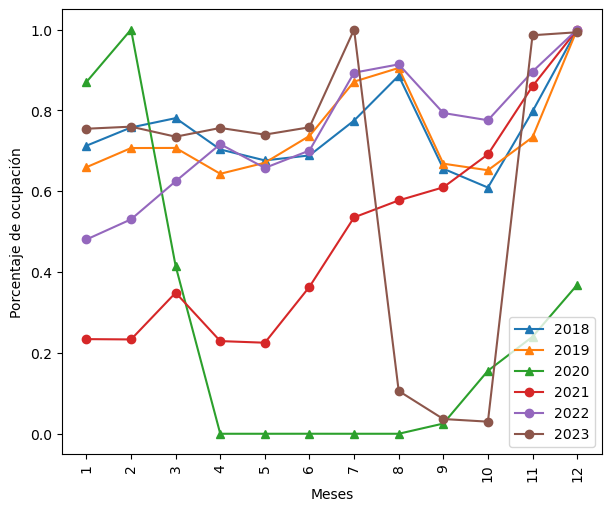

In [421]:
fig, ax = plt.subplots(1, figsize = (6,5), layout = "constrained")
for agnio in range(2018,2024):
    agnio = str(agnio)
    a = {}
    for mes in range(1,13):
        a[str(mes)] =  df_filtrado[(df_filtrado["meses"]==mes)&(df_filtrado["agnio"]==agnio)]["cantidad_de_filas"].sum()
    max_val = max(a.values())
    for i in a:
        a[i]/=max_val
    if int(agnio) < 2021:
        plt.plot(a.keys(), a.values(), "^-", label = agnio)
    else:
        plt.plot(a.keys(), a.values(), "o-", label = agnio)
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Meses")
plt.ylabel("Porcentaje de ocupación")
plt.legend()

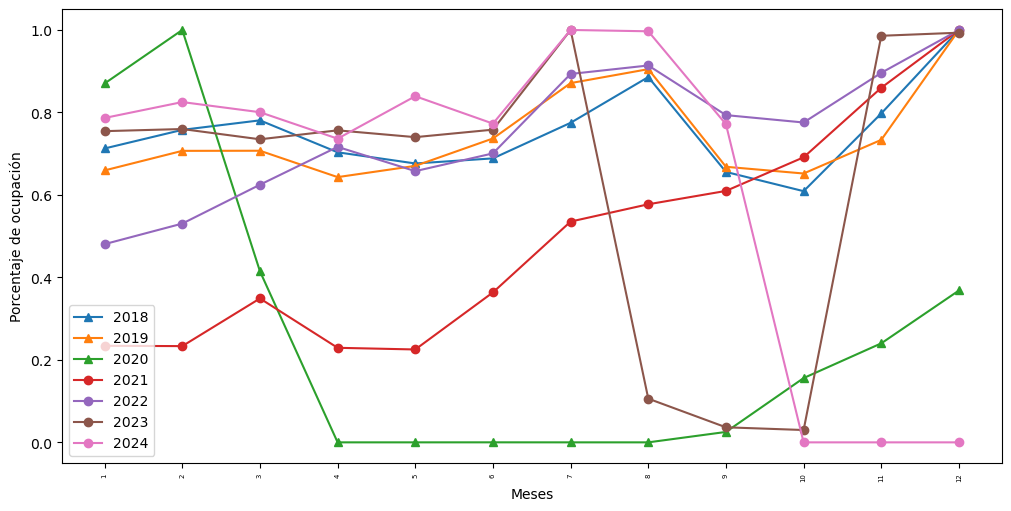

In [436]:
fig, ax = plt.subplots(1, figsize = (10,5), layout = "constrained")
for agnio in range(2018,2025):
    agnio = str(agnio)
    a = {}
    for mes in range(1,13):
        a[str(mes)] =  df_filtrado[(df_filtrado["meses"]==mes)&(df_filtrado["agnio"]==agnio)]["cantidad_de_filas"].sum()
    max_val = max(a.values())
    for i in a:
        a[i]/=max_val
    if int(agnio) < 2021:
        plt.plot(a.keys(), a.values(), "^-", label = agnio)
    else:
        plt.plot(a.keys(), a.values(), "o-", label = agnio)
plt.xticks(rotation=90, fontsize=5)
plt.xlabel("Meses")
plt.ylabel("Porcentaje de ocupación")
plt.legend()

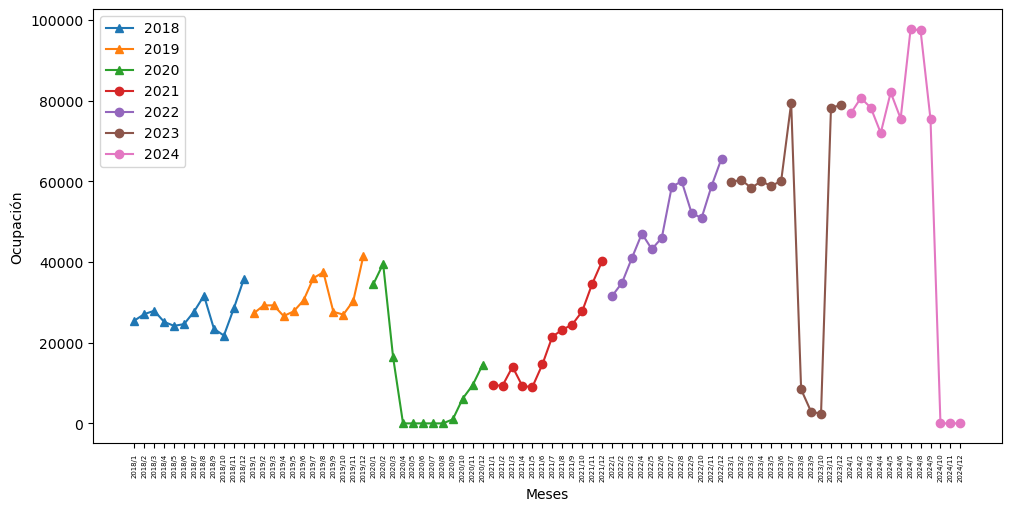

In [437]:
fig, ax = plt.subplots(1, figsize = (10,5), layout = "constrained")
for agnio in range(2018,2025):
    a = {}
    agnio = str(agnio)
    for mes in range(1,13):
        a[agnio + "/" +str(mes)] =  df_filtrado[(df_filtrado["meses"]==mes)&(df_filtrado["agnio"]==agnio)]["cantidad_de_filas"].sum()
    if int(agnio) < 2021:
        plt.plot(a.keys(), a.values(), "^-", label = agnio)
    else:
        plt.plot(a.keys(), a.values(), "o-", label = agnio)
plt.xticks(rotation=90, fontsize=5)
plt.xlabel("Meses")
plt.ylabel("Ocupación")
plt.legend()

In [407]:
#LABEL ENCODER
# filtrar: categoria_migratoria, motivo_viaje ( ue se cuece), ciudad_hospedaje
#pais_nacionalidad onehot
columnas=["sexo", "colombiano_extranjero", "pais_nacionalidad"]
for columna in columnas:
    le= LabelEncoder()
    le.fit(df_filtrado[columna])
    df_filtrado[columna]=le.transform(df_filtrado[columna])
    


C:\Users\santi\AppData\Local\Temp\ipykernel_40972\613960593.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado[columna]=le.transform(df_filtrado[columna])
C:\Users\santi\AppData\Local\Temp\ipykernel_40972\613960593.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado[columna]=le.transform(df_filtrado[columna])
C:\Users\santi\AppData\Local\Temp\ipykernel_40972\613960593.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [408]:
df_filtrado.isnull().sum()/df_filtrado.shape[0]

cantidad_de_filas           0.0
agnio                       0.0
region_destino              0.0
region_nacionalidad         0.0
entrada_salida              0.0
sexo                        0.0
categoria_migratoria        0.0
motivo_viaje                0.0
departamento_hospedaje      0.0
ciudad_hospedaje            0.0
colombiano_extranjero       0.0
puesto_migratorio           0.0
tipo_transporte             0.0
centro_regional             0.0
pais_nacionalidad           0.0
meses                       0.0
pais_destino_procedencia    0.0
rango_edad                  0.0
departamento                0.0
tipo_viajero                0.0
dtype: float64

In [409]:
# Obtener la moda de 'rango_edad' y tomar el primer valor
moda_edad = df_filtrado["rango_edad"].mode()[0]

# Rellenar los valores nulos en 'rango_edad' con la moda
df_filtrado["rango_edad"] = df_filtrado["rango_edad"].fillna(moda_edad)

df_filtrado["rango_edad_int"] = df_filtrado["rango_edad"].apply(lambda x: int(x[:2].strip("-")))
# df_filtrado["rango_edad_int"] = df_filtrado["rango_edad"].apply(lambda x: x)

C:\Users\santi\AppData\Local\Temp\ipykernel_40972\1173787926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["rango_edad"] = df_filtrado["rango_edad"].fillna(moda_edad)
C:\Users\santi\AppData\Local\Temp\ipykernel_40972\1173787926.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["rango_edad_int"] = df_filtrado["rango_edad"].apply(lambda x: int(x[:2].strip("-")))


In [410]:
df_filtrado["rango_edad"].value_counts()

rango_edad
30-39       103516
18-29        93525
40-49        73560
50-59        56572
60-69        35590
0-17         24592
70 o Mas     17297
Name: count, dtype: int64

<Axes: >

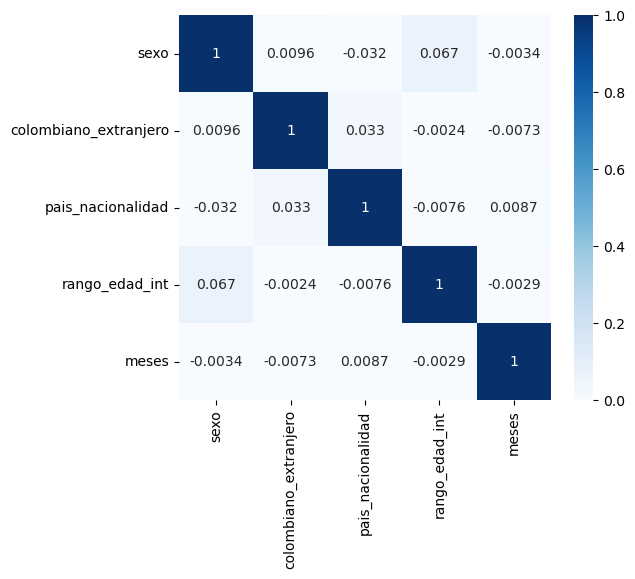

In [411]:
dejar = columnas + ["rango_edad_int", "meses"]
plt.figure(figsize=(6, 5))
sns.heatmap(df_filtrado[dejar].corr(), cmap="Blues", vmin=0, vmax=1, annot = True)

<Axes: >

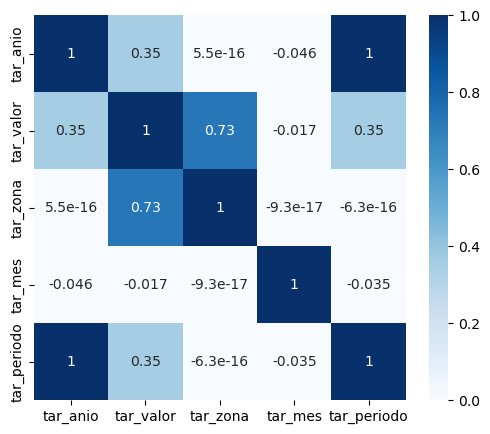

In [412]:
df_tarifas=pd.read_csv("./DATA/csv/tarifa_promedio_mensual_zona.csv")
le_tarifas= LabelEncoder()
le_tarifas.fit(df_tarifas["tar_zona"])
df_tarifas["tar_zona"]=le_tarifas.transform(df_tarifas["tar_zona"])
#202209
df_tarifas["tar_anio"]=df_tarifas["tar_periodo"].apply(lambda x: x//100)
df_tarifas["tar_mes"]=df_tarifas["tar_periodo"].apply(lambda x:x%100)

dejar = ["tar_anio", "tar_valor", "tar_zona", "tar_mes", "tar_periodo"]
plt.figure(figsize=(6, 5))
sns.heatmap(df_tarifas[dejar].corr(), cmap="Blues", vmin=0, vmax=1, annot = True)

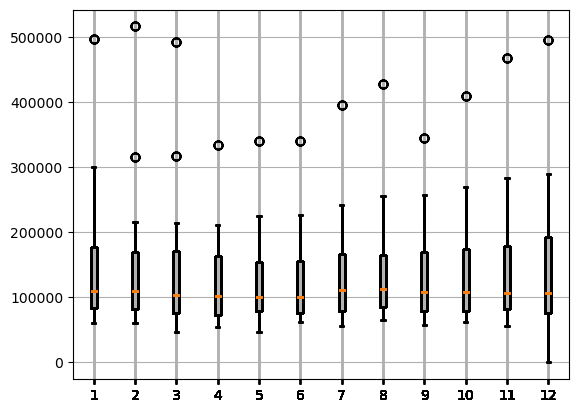

In [413]:
for mes in df_tarifas["tar_mes"]:
    plt.boxplot(df_tarifas[df_tarifas["tar_mes"] == mes]["tar_valor"], positions=[mes])
    plt.grid(True)
    
#no nos importa

<Axes: >

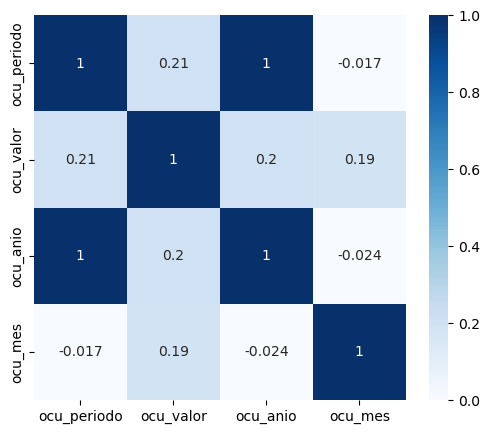

In [416]:
#OCUPACION HOTELES POR PERIODOS
df_ocupacion=pd.read_csv("./DATA/csv/porcentaje_ocupacion_hotelera_mensual_de_medellin (1).csv")
#ocu_periodo,ocu_valor
plt.figure(figsize=(6, 5))
df_ocupacion["ocu_anio"]=df_ocupacion["ocu_periodo"].apply(lambda x: x//100)
df_ocupacion["ocu_mes"]=df_ocupacion["ocu_periodo"].apply(lambda x:x%100)

sns.heatmap(df_ocupacion[["ocu_periodo","ocu_valor", "ocu_anio", "ocu_mes"]].corr(), cmap="Blues", vmin=0, vmax=1, annot = True)

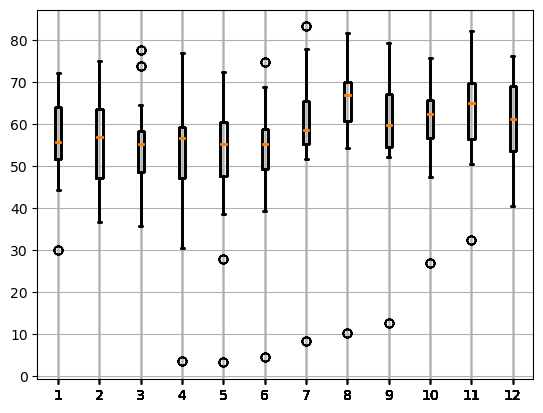

In [417]:
for mes in df_ocupacion["ocu_mes"]:
    plt.boxplot(df_ocupacion[df_ocupacion["ocu_mes"] == mes]["ocu_valor"], positions=[mes])
    plt.grid(True)